### training the BrainAlignNet

In [1]:
from train import set_GPU, fit_deepreg

2024-08-19 17:24:13.529301: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-19 17:24:13.529401: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-19 17:24:13.531305: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
base = "/home/alicia/notebook/alicia/BrainAlignNet"
config_path = f"{base}/demo_notebook/demo_network_config.yaml"
log_dir = f"{base}/demo_notebook"
experiment_name = "test_full_network"
max_epochs = 2
initial_epoch = 1

In [3]:
set_GPU(3)
fit_deepreg(
    config_path,
    log_dir,
    experiment_name,
    max_epochs,
    initial_epoch)

2024-08-19 17:24:15 | WARNING  | Log directory /home/alicia/notebook/alicia/BrainAlignNet/demo_notebook/test_full_network exists already.
Built inputs.
Built control points.
Concatenated images.
{'extract_levels': ListWrapper([0, 1, 2, 3]), 'name': 'local', 'num_channel_initial': 16}
Built backbone.
Built DDF.
Built warping.
Built outputs.


I0000 00:00:1724088303.003781 3360949 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Epoch 1/2
1/1 [==============================] - 10s 10s/step - loss: 0.0955 - metric/moving_image_mean: 0.0022 - metric/moving_image_min: 0.0000e+00 - metric/moving_image_max: 0.9740 - metric/fixed_image_mean: 0.0022 - metric/fixed_image_min: 0.0000e+00 - metric/fixed_image_max: 0.9263 - loss/image_LocalNormalizedCrossCorrelationLoss: -0.1766 - loss/image_LocalNormalizedCrossCorrelationLoss_weighted: -0.1766 - metric/moving_label_mean: 54.2862 - metric/moving_label_min: -1.0000 - metric/moving_label_max: 267.3787 - metric/fixed_label_mean: 54.4184 - metric/fixed_label_min: -1.0000 - metric/fixed_label_max: 268.4514 - loss/label_CentroidDistance: 2.7215 - loss/label_CentroidDistance_weighted: 0.2722 - loss/regularization_HybridNorm: 2.7577e-05 - loss/regularization_HybridNorm_weighted: 2.7577e-05 - metric/ddf_mean: -0.0030 - metric/ddf_min: -0.5083 - metric/ddf_max: 0.5841 - val_loss: 0.4784 - val_metric/moving_image_mean: 0.0018 - val_metric/moving_image_min: 0.0000e+00 - val_metric/m

### register test (unseen) images with checkpoint (weights of the trained network)

In [1]:
from register import set_GPU, register

2024-08-19 18:24:12.440159: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-19 18:24:12.485399: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-19 18:24:12.485439: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-19 18:24:12.486868: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-19 18:24:12.494263: I tensorflow/core/platform/cpu_feature_guar

In [2]:
base = "/home/alicia/notebook/alicia/BrainAlignNet"
model_config_path = f"{base}/demo_notebook/demo_network_config.yaml"
model_ckpt_path = f"{base}/demo_notebook/test_full_network/save/ckpt-2"

In [3]:
set_GPU(3)
registered_outputs = register(model_config_path, model_ckpt_path)

  0%|                                                                                | 0/1 [00:00<?, ?it/s]2024-08-19 18:24:14.688190: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46576 MB memory:  -> device: 3, name: NVIDIA RTX 6000 Ada Generation, pci bus id: 0000:c2:00.0, compute capability: 8.9


2024-08-19 18:24:15 | WARNING  | Log directory outputs/outputs exists already.
2024-08-19 18:24:15 | WARNING  | Using customized configuration. The code might break if the config doesn't match the saved model.
Built inputs.
Built control points.
Concatenated images.
{'extract_levels': ListWrapper([0, 1, 2, 3]), 'name': 'local', 'num_channel_initial': 16}
Built backbone.
Built DDF.
Built warping.


2024-08-19 18:24:18.418322: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
100%|████████████████████████████████████████████████████████████████████████| 1/1 [00:13<00:00, 13.17s/it]

#### plot registered outputs

In [4]:
import matplotlib.pyplot as plt

In [19]:
output_dict = registered_outputs['test']['1037to1125']
warped_moving_image = output_dict['warped_moving_image']
warped_moving_roi = output_dict['warped_moving_roi']
warped_moving_centroids = output_dict['warped_moving_centroids']

In [20]:
warped_moving_image.shape, warped_moving_roi.shape, warped_moving_centroids.shape

((284, 120, 64), (284, 120, 64), (200, 3))

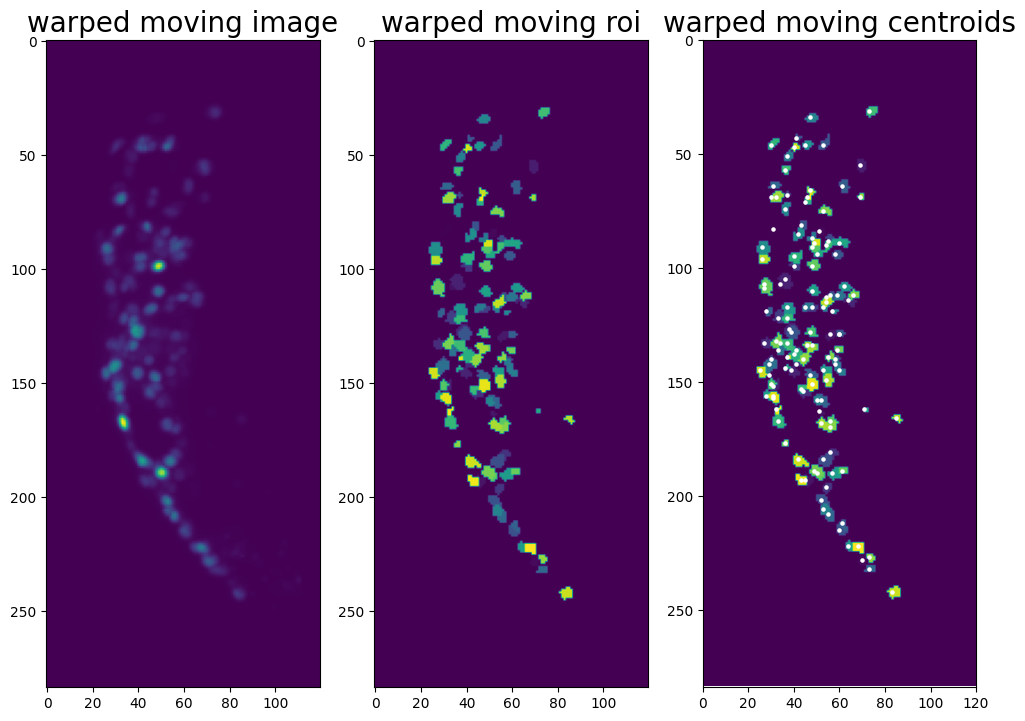

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(12, 12))
axes[0].imshow(warped_moving_image.max(2));
axes[0].set_title("warped moving image", fontsize=20);
axes[1].imshow(warped_moving_roi.max(2));
axes[1].set_title("warped moving roi", fontsize=20);

axes[2].imshow(warped_moving_roi.max(2));
axes[2].set_title("warped moving roi", fontsize=20);

xs = [x for (x, _, _) in warped_moving_centroids]
ys = [y for (_, y, _) in warped_moving_centroids]


axes[2].scatter(ys, xs, s=5, c='w');
axes[2].set_title("warped moving centroids", fontsize=20);
axes[2].set_xlim(0, 120);
axes[2].set_ylim(0, 284);
axes[2].invert_yaxis()